# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

Around 15, just like if you flipped a coin 100 times you'd get heads around 50 times.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

Here is a graph of the chances someone will get an elixir based on how many boxes they opened.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline


In [77]:
p_loot=0.15
trials=15
loot_dist=stats.binom(trials,p_loot)

In [78]:
loot_outcomes=list(range(0,16))

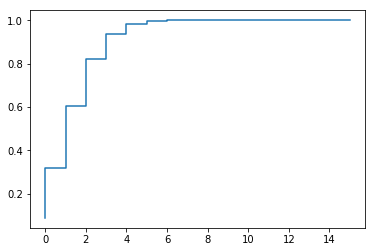

In [79]:
plt.step(loot_outcomes,loot_dist.cdf(loot_outcomes))

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

Because it can be counted and it is one of two outcomes - elixir or no elixir.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [61]:
trials=100
p_20_less=0
loot_dist=stats.binom(trials,p_loot)
for box in range(21):
    p_20_less+=loot_dist.pmf(box)
p_20_more=1-p_20_less
p_20_more

0.06631976581888699

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [62]:
trials=100
loot_dist=stats.binom(trials,p_loot)
loot_outcomes=list(range(0,101))
p_20_more=1-loot_dist.cdf(20)
p_20_more

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

It's about 6% boss.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Poisson because it looks at outcomes over a fixed period of time

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

<BarContainer object of 10 artists>

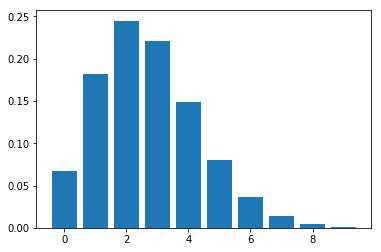

In [44]:
n_loots=2.7
loots_dist=stats.poisson(n_loots)
loots_outcomes=list(range(0,10))
plt.bar(loots_outcomes,loots_dist.pmf(loots_outcomes))

This shows us the pmf of an individual user getting between 0 and 10 boxes in a day - we want to find how many users it takes for their pmf outcomes to add up to 500000

In [63]:
#This cell and the following one are not necesary but I made them to better understand
loots_dist.pmf(loots_outcomes)

array([0.06720551, 0.18145488, 0.24496409, 0.22046768, 0.14881569,
       0.08036047, 0.03616221, 0.01394828, 0.00470755, 0.00141226])

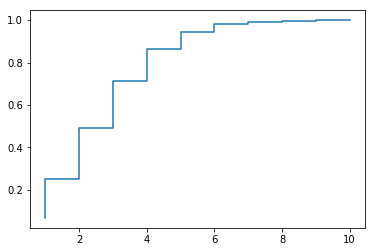

In [64]:
possible_loots_per_user=[1,2,3,4,5,6,7,8,9,10]
p_possible_loots_per_user=[0.06720551, 0.18145488, 0.24496409, 0.22046768, 0.14881569,
       0.08036047, 0.03616221, 0.01394828, 0.00470755, 0.00141226]
plt.step(possible_loots_per_user, np.cumsum(p_possible_loots_per_user))

In [65]:
revenue=0
#I found this range manually
def find_users(minimum,maximum):
    for user in range(184000, 200000):
        revenue=np.random.poisson(2.7, user).sum()
        if revenue>=500000:
            return(user)

In [66]:
find_users(184000, 200000)

184379

In [67]:
#simulate 11 times
number_of_users=[]
for simulation in range(11):
    a=find_users(184000, 184500)
    print(a)

184669
184684
184456
184458
184525
184405
184497
184610
184588
184547
184503


In [68]:
number_of_users=sum([184481,184607,184586,184570,184606,184520,184400,184329,184481,184660,184613])/11

In [69]:
number_of_users

184532.0909090909

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [70]:
list_of_outcomes=np.random.poisson(2.7, 184532)
five_or_more_outcomes=[item for item in list_of_outcomes if item>=5]
five_or_more_outcomes_total=sum(five_or_more_outcomes)
print(five_or_more_outcomes_total)
500000-141761

142564


358239

High value users will five 141761$

Low value users will give 358239$

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

The average number of loot boxes purchased per user, the minimum and maximum loot boxes per user (since each box costs 1$ this is also the min/max revenue), the proportion of user types in terms of high/low value(in bins of 5), the average per week

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [71]:
# I think this should be .binom with a probability of 0.15 and not .choice
def find_elixir():
    for box in range(1, 20):
        boxes_til_elixir=np.random.choice([0,1],box)
        if 1 in boxes_til_elixir:
            #print(box)
            return(box)

In [72]:
trial_outcomes=list(range(100000))
for trial in range(100000):
    trial_outcomes[trial]=(find_elixir())

In [73]:
avg_boxes=sum(trial_outcomes)/100000
avg_boxes

1.64056

### remake with binom instead of random choice

In [74]:
def find_elixir_bimom():
    for box in range(1, 20):
        boxes_til_elixir=np.random.binom(0.15,box)
        if 1 in boxes_til_elixir:
            #print(box)
            return(box)

In [75]:
trial_outcomes=list(range(100000))
for trial in range(100000):
    trial_outcomes[trial]=(find_elixir())
avg_boxes=sum(trial_outcomes)/100000
avg_boxes

1.64586

1.63707

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

A dictionary, because the type of item is a key and the amount is a value

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

The total amount of revenue generated and the fluctuation in the number of users